In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
from clustering_techniques import dbscan
from validation_scores import silhouettescore
from validation_scores import S_Dbw
from dimensionality_reduction import pca
import pandas as pd

breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

# Drop 16 missing values from bare nuclei 
X_cleaned = X.dropna()

X_nan_array = np.isnan(X)

# converting to numpy array

X_cleaned = X_cleaned.values

# normalising data

X_cleaned_normalised = (X_cleaned - np.min(X_cleaned, axis=0))/(np.max(X_cleaned,axis=0) - np.min(X_cleaned, axis=0))

# pca transformation of data

eigenvalues,eigenvectors,pca_data,pca_transformed = pca(X_cleaned_normalised, 5).transformation()

# dbscan results using pca-transformed data

noise,clustering_pca = dbscan(pca_transformed, 0.541, 20).dbscan_clustering()

# visualising dbscan results

dbscan(pca_transformed, 0.541, 20).dbscan_visualisation(clustering_pca, PCA=True)






# splitting data into clusters to calculate centroids

pca_data_noiseless=pca_transformed[clustering_pca!=0]
pca_clustering_noiseless=clustering_pca[clustering_pca!=0]
pca_clustering_noiseless=pca_clustering_noiseless-1


cluster2=pca_data_noiseless[pca_clustering_noiseless==0]
cluster3=pca_data_noiseless[pca_clustering_noiseless==1]

# calculating cluster centroids

centroid2=np.mean(cluster2,axis=0)
centroid3=np.mean(cluster3,axis=0)
centroids_pca=np.vstack((centroid2,centroid3))

# S_Dbw score

sdbw_pca=S_Dbw(pca_data_noiseless,pca_clustering_noiseless,centroids_pca).result()

print('S_Dbw for DBSCAN pca-transformed data: ',sdbw_pca)

# calculating silhouette score


silhouettescore(pca_transformed,clustering_pca).score(noise=True)
print('SIl for DBSCAN PCA-transformed')







# separating clusters

cluster1 = X_cleaned[clustering==1]
cluster2 = X_cleaned[clustering==2]

# noise not used in calculation of cluster

noise = X_cleaned[clustering==0]

# finding mean, std, etx of each cluster

cluster1 = pd.DataFrame(cluster1)
cluster2 = pd.DataFrame(cluster2)

cluster1_description = cluster1.describe()
cluster2_description = cluster2.describe()

print('cluster 1 description: ',cluster1_description)
print('cluster 2 description: ',cluster2_description)

# differences in each cluster

cluster_diff = cluster2_description - cluster1_description



ModuleNotFoundError: No module named 'ucimlrepo'

Silhouette score  =  0.5366544619388331
Silhouette score  =  0.4809864408315116
Silhouette score  =  0.4635012408963962
Silhouette score  =  0.4383554282494643
Silhouette score  =  0.5879520886172482
Silhouette score  =  0.5421474819704227
Silhouette score  =  0.5387856819622021
Silhouette score  =  0.5442972562420507
Silhouette score  =  0.4324537874730408
Silhouette score  =  0.3335266472996339
Silhouette score  =  0.3598961501064295
Silhouette score  =  0.39667775330429966
Silhouette score  =  0.4451957558016826
Silhouette score  =  0.5791167782548182
Silhouette score  =  0.5890211652131383
Silhouette score  =  0.626125914394441
Silhouette scores for pca-transformed knn for k=2-5: [0.5879520886172482, 0.5421474819704227, 0.5387856819622021, 0.5442972562420507]
Silhouette scores for pca-transformed gmm for k=2-5: [0.4451957558016826, 0.5791167782548182, 0.5890211652131383, 0.626125914394441]
S_Dbw scores for pca-transformed knn for k=2-5: [0.6563244249223468, 0.7360922438164139, 0.78

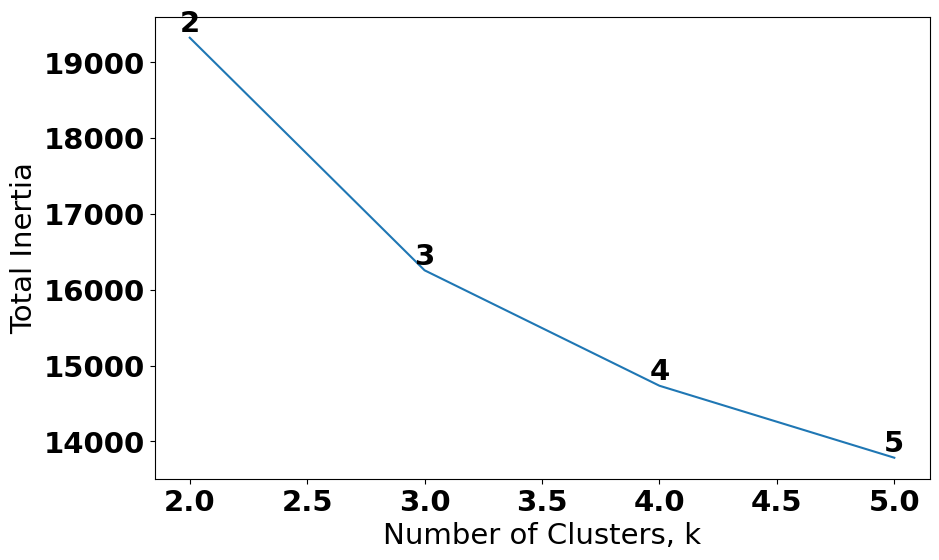

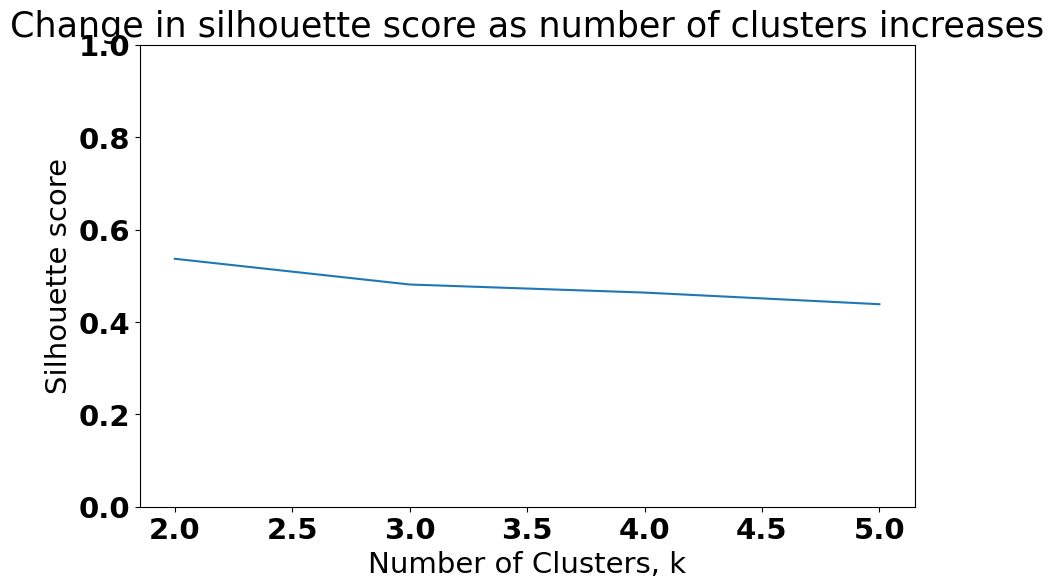

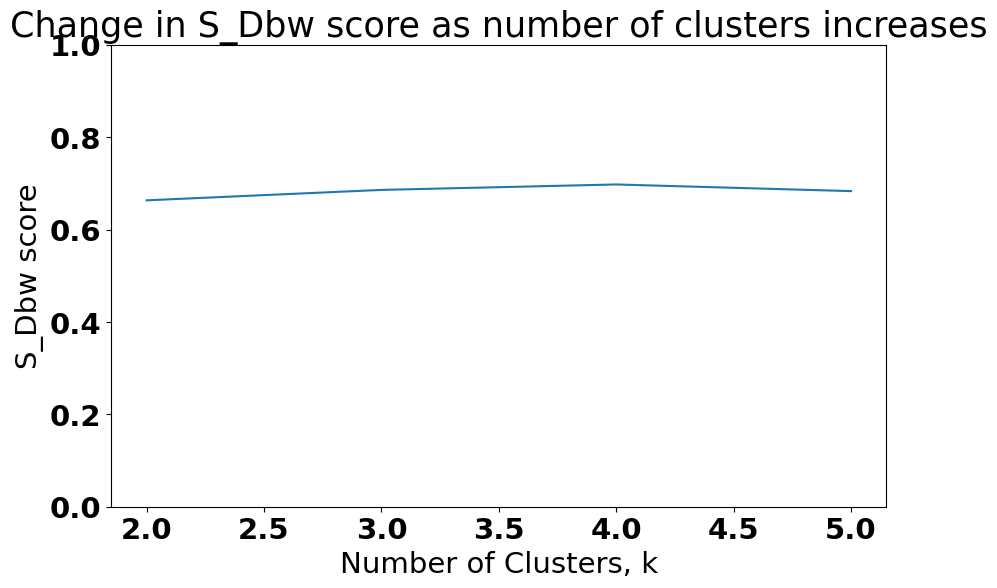

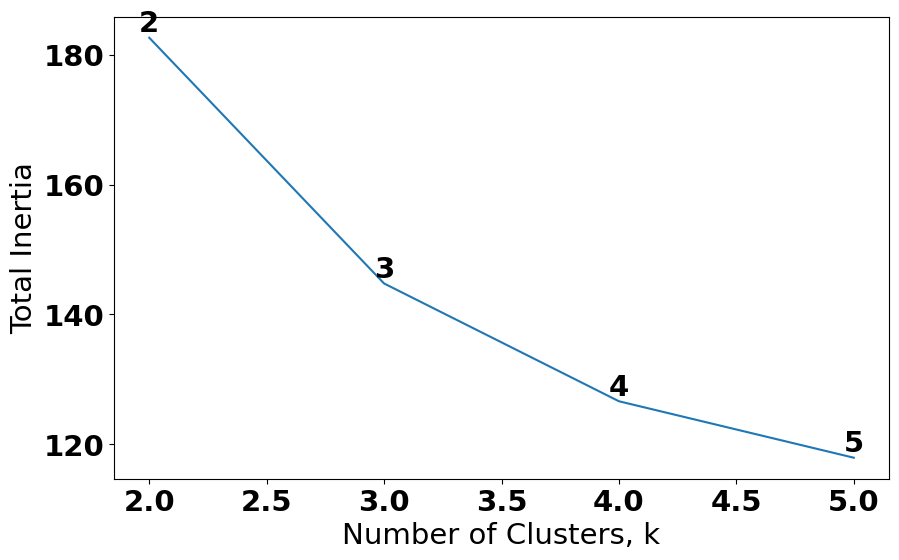

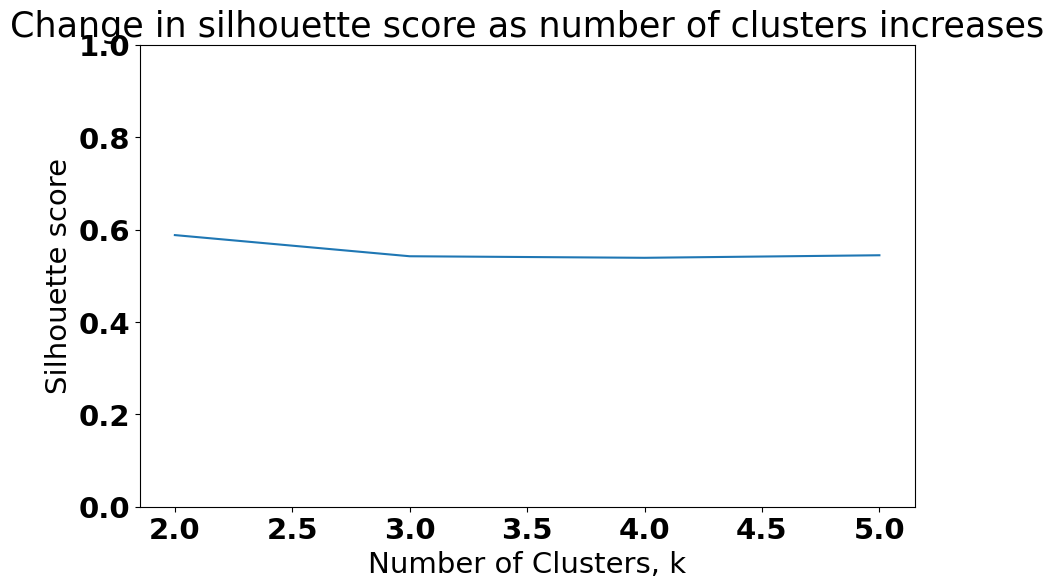

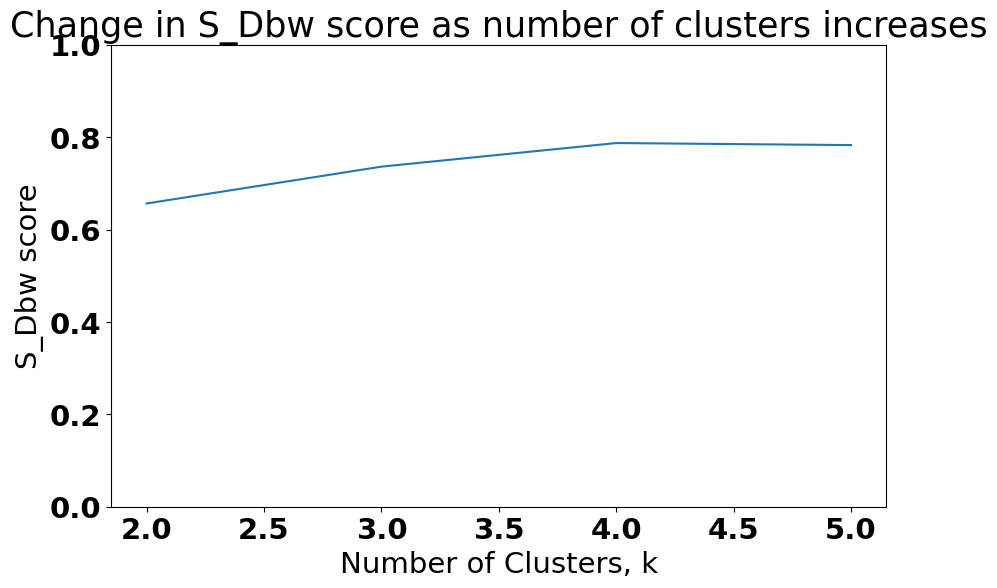

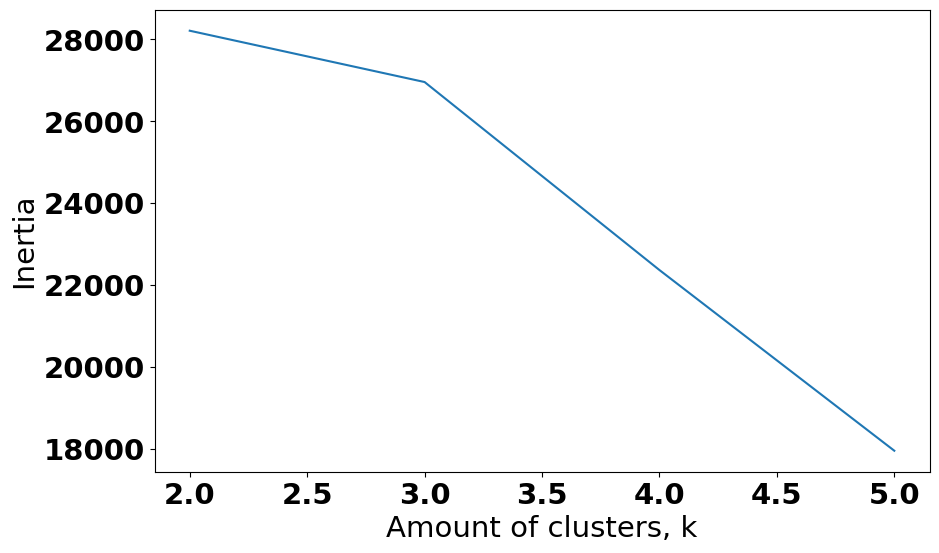

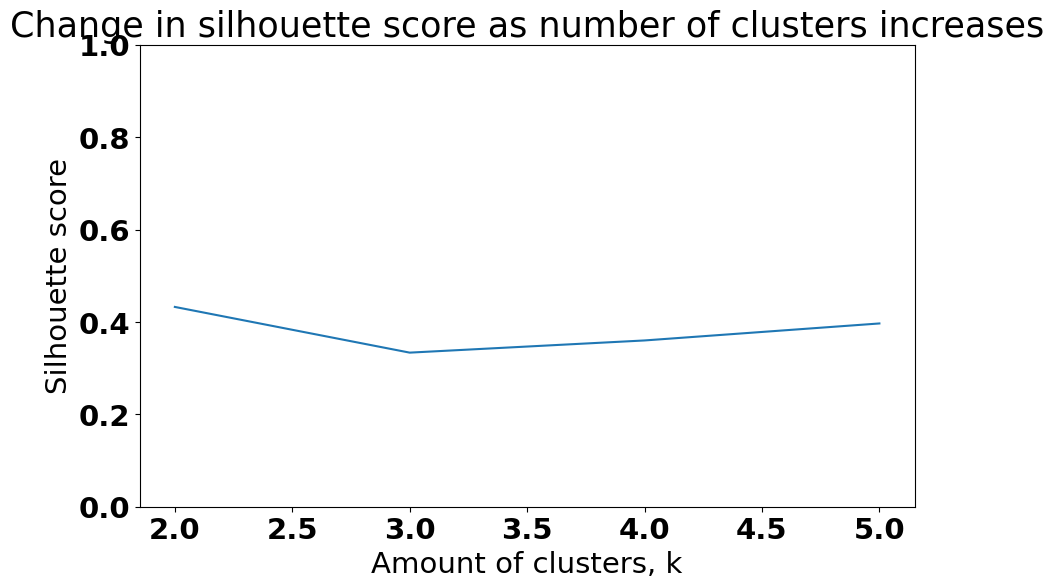

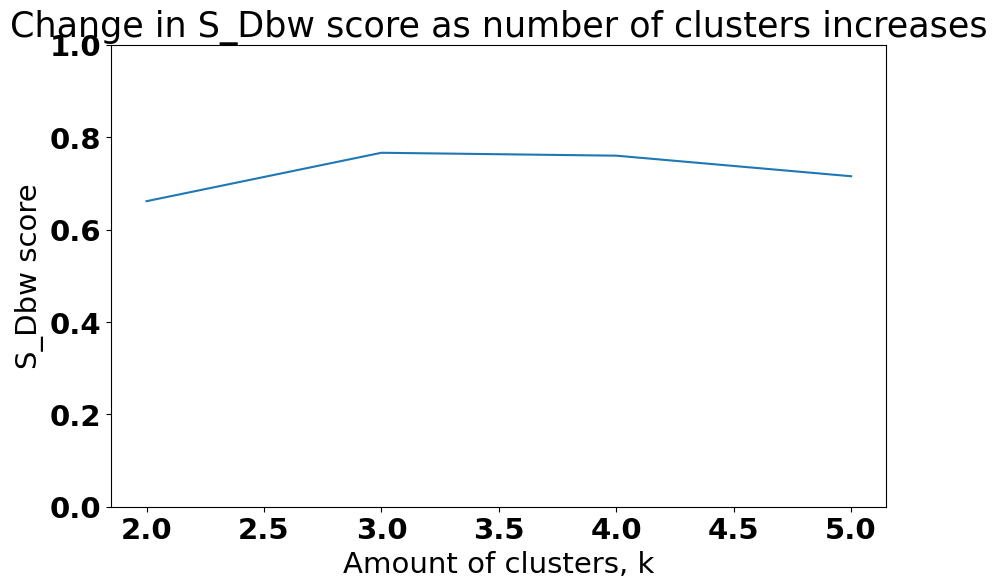

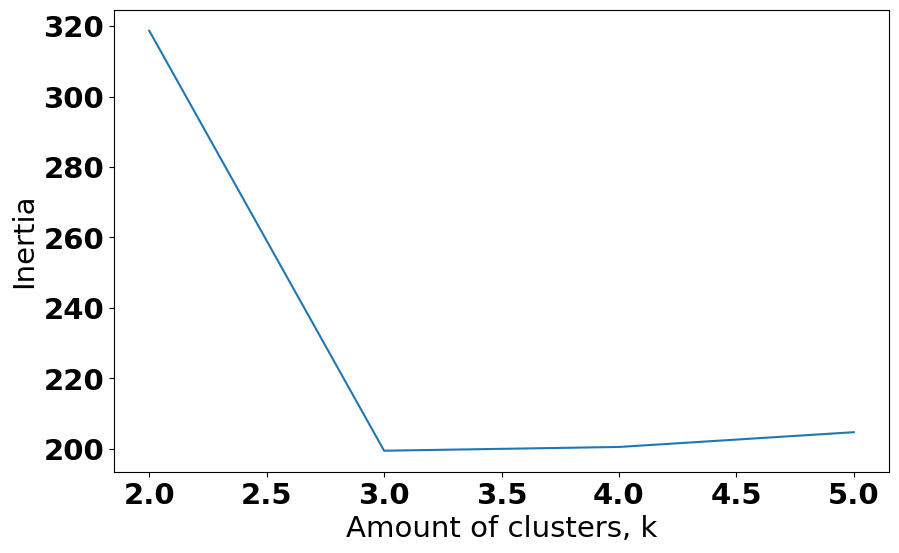

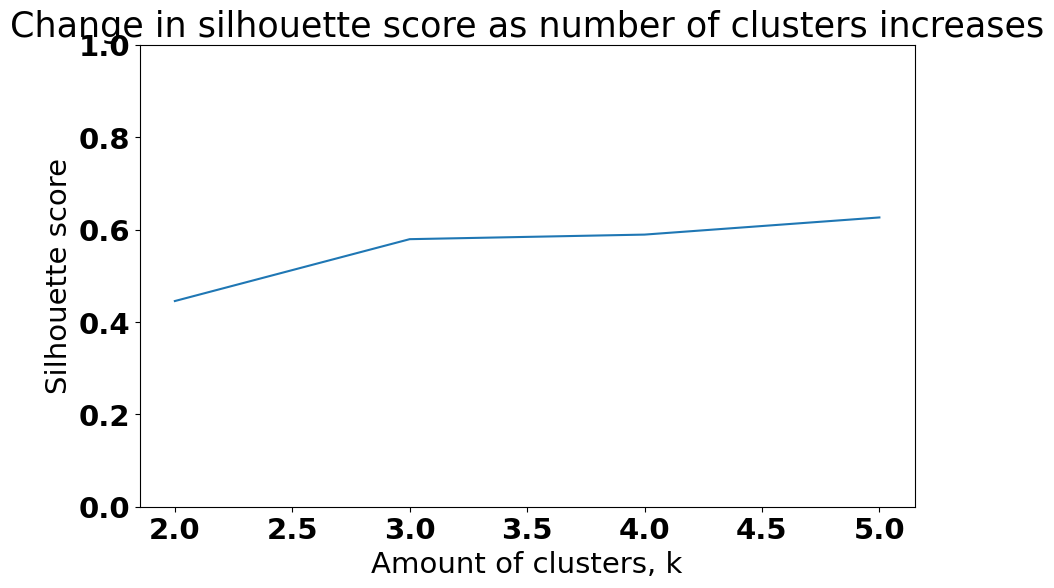

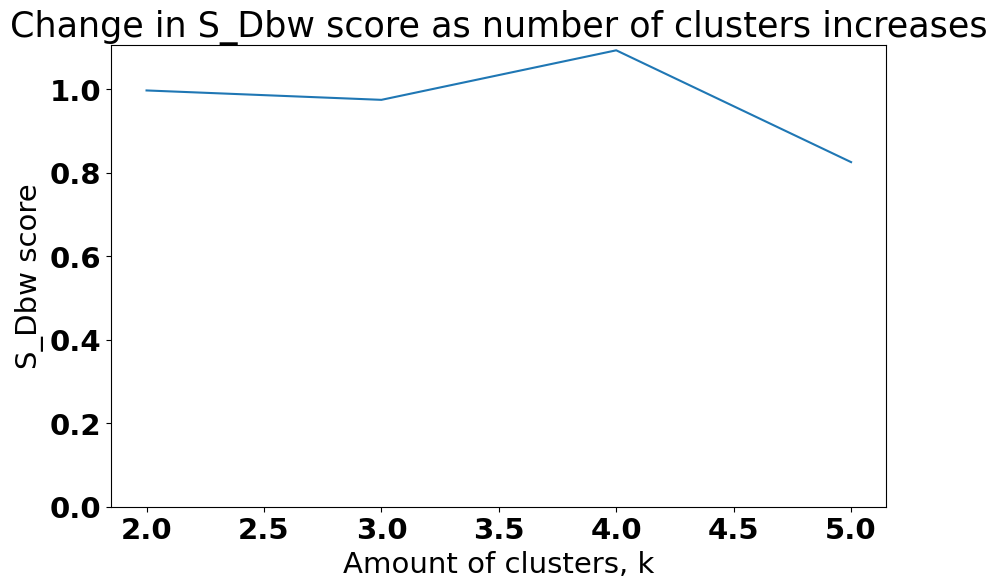

In [8]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
from dimensionality_reduction import pca
from optimal_clustering import INERTIA
from optimal_clustering import meanssquared
import matplotlib.pyplot as plt
from clustering_techniques import dbscan
import pandas as pd

# predeterming range of values to observe

k_range=range(2,6)

# Inertias of original data (to showcase difference from 1st to 2nd k)

inertia_cleaned_data=INERTIA(X_cleaned,np.array(np.zeros(len(X_cleaned)))).result()
inertia_pca_data=INERTIA(pca_transformed,np.array(np.zeros(len(X_cleaned)))).result()

# plotting scores of k-means on cleaned but raw data
print(f'K means raw data:')
inertia_values_knn,inertia_difference_knn,silhouettes_knn,sdbws_knn=meanssquared(X_cleaned,k_range).knn_meanssquared()

# plotting scores of k-means on transformed data
print(f'K means PCA data:')
inertia_values_pca_knn,inertia_difference_pca_knn,silhouettes_pca_knn,sdbws_pca_knn=meanssquared(pca_transformed,k_range).knn_meanssquared()

# plotting scores of gmm on cleaned but raw data
print(f'GMM raw data:')
inertia_values_gmm,inertia_difference_gmm,silhouettes_gmm,sdbws_gmm,actuals=meanssquared(X_cleaned,k_range).gmm_meanssquared()

# plotting scores of gmm on pca transformed data
print(f'GMM PCA data:')
inertia_values_pca_gmm,inertia_difference_pca_gmm,silhouettes_pca_gmm,sdbws_pca_gmm,actuals_pca=meanssquared(pca_transformed,k_range).gmm_meanssquared()

# printing scores

print('Silhouette scores for pca-transformed knn for k=2-5:',silhouettes_pca_knn )
print('Silhouette scores for pca-transformed gmm for k=2-5:',silhouettes_pca_gmm )

print('S_Dbw scores for pca-transformed knn for k=2-5:',sdbws_pca_knn )
print('S_Dbw scores for pca-transformed gmm for k=2-5:',sdbws_pca_gmm )



In [ ]:
# For correlations 

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = np.corrcoef(X.T)

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# For visualising principal component loadings 

breast_cancer_wisconsin_original

pc1 = pca_transformed[:,0]
pc2 = pca_transformed[:, 1]


df = breast_cancer_wisconsin_original

# Remove unnecessary columns 
cols_to_drop = ['Sample ID', 'Class']
df.drop(columns=cols_to_drop, inplace=True)

# Sort out NAN values in BareNuclei Column (removing them for now)
df['BareNuclei'] = df['BareNuclei'].replace('?', np.nan)
df = df.dropna()
df['BareNuclei'] = df['BareNuclei'].astype('int64')

features = df.columns  # Replace with actual feature names

df1 = pd.DataFrame({
    'Features':features,
    'PC1 Loading': eigenvectors[:,0],
    'PC2 Loading':eigenvectors[:,1]
})
df1[['PC1 Loading', 'PC2 Loading']] = df1[['PC1 Loading', 'PC2 Loading']].abs()
styled_df = df1.style.background_gradient(cmap='Greens')
styled_df

In [ ]:
# For the bare nuclei analysis 

# Create a new column for the categorization
df['BareNuclei Category'] = df['BareNuclei'].apply(lambda x: '1-5' if x >= 6 else '6-10')

# Calculate the frequency of each category within each cluster
category_freq = df.groupby(['Cluster', 'BareNuclei Category']).size().reset_index(name='Frequency')
category_freq